# Importing packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Overview

In [2]:
raw_data = pd.read_csv('./car_evaluation.csv')

In [3]:
raw_data.shape

(1728, 7)

In [4]:
raw_data.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
raw_data.columns = raw_data.columns.str.replace(' ', '_')

In [7]:
raw_data.columns

Index(['buying_price', 'maintenance_cost', 'number_of_doors',
       'number_of_persons', 'lug_boot', 'safety', 'decision'],
      dtype='object')

# __Exploratory Data Analysis__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
numcols = data.select_dtypes(exclude=['object']).columns
objcols = data

In [10]:
def valuecounts(x):
     return data[x].value_counts()

In [11]:
valuecounts('number_of_persons')

2       576
4       576
more    576
Name: number_of_persons, dtype: int64

<AxesSubplot: xlabel='number_of_persons', ylabel='count'>

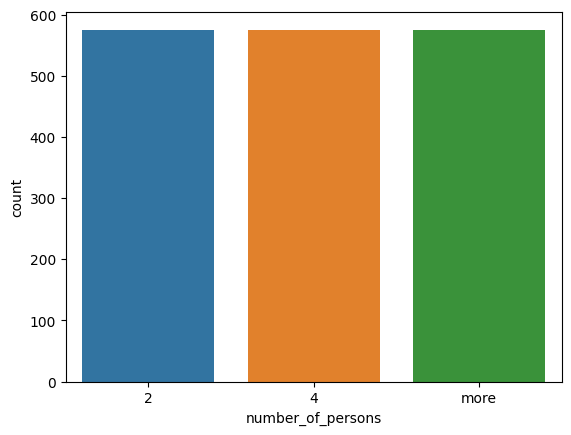

In [12]:
sns.countplot(data=data, x='number_of_persons')

## Missing Values

In [13]:
data.isna().sum()

buying_price         0
maintenance_cost     0
number_of_doors      0
number_of_persons    0
lug_boot             0
safety               0
decision             0
dtype: int64

In [14]:
data.duplicated().sum()

0

## Encoding

In [15]:
objcol = data.select_dtypes('object').columns


In [16]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
data[objcol] = encode.fit_transform(data[objcol].values)

In [17]:
data

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


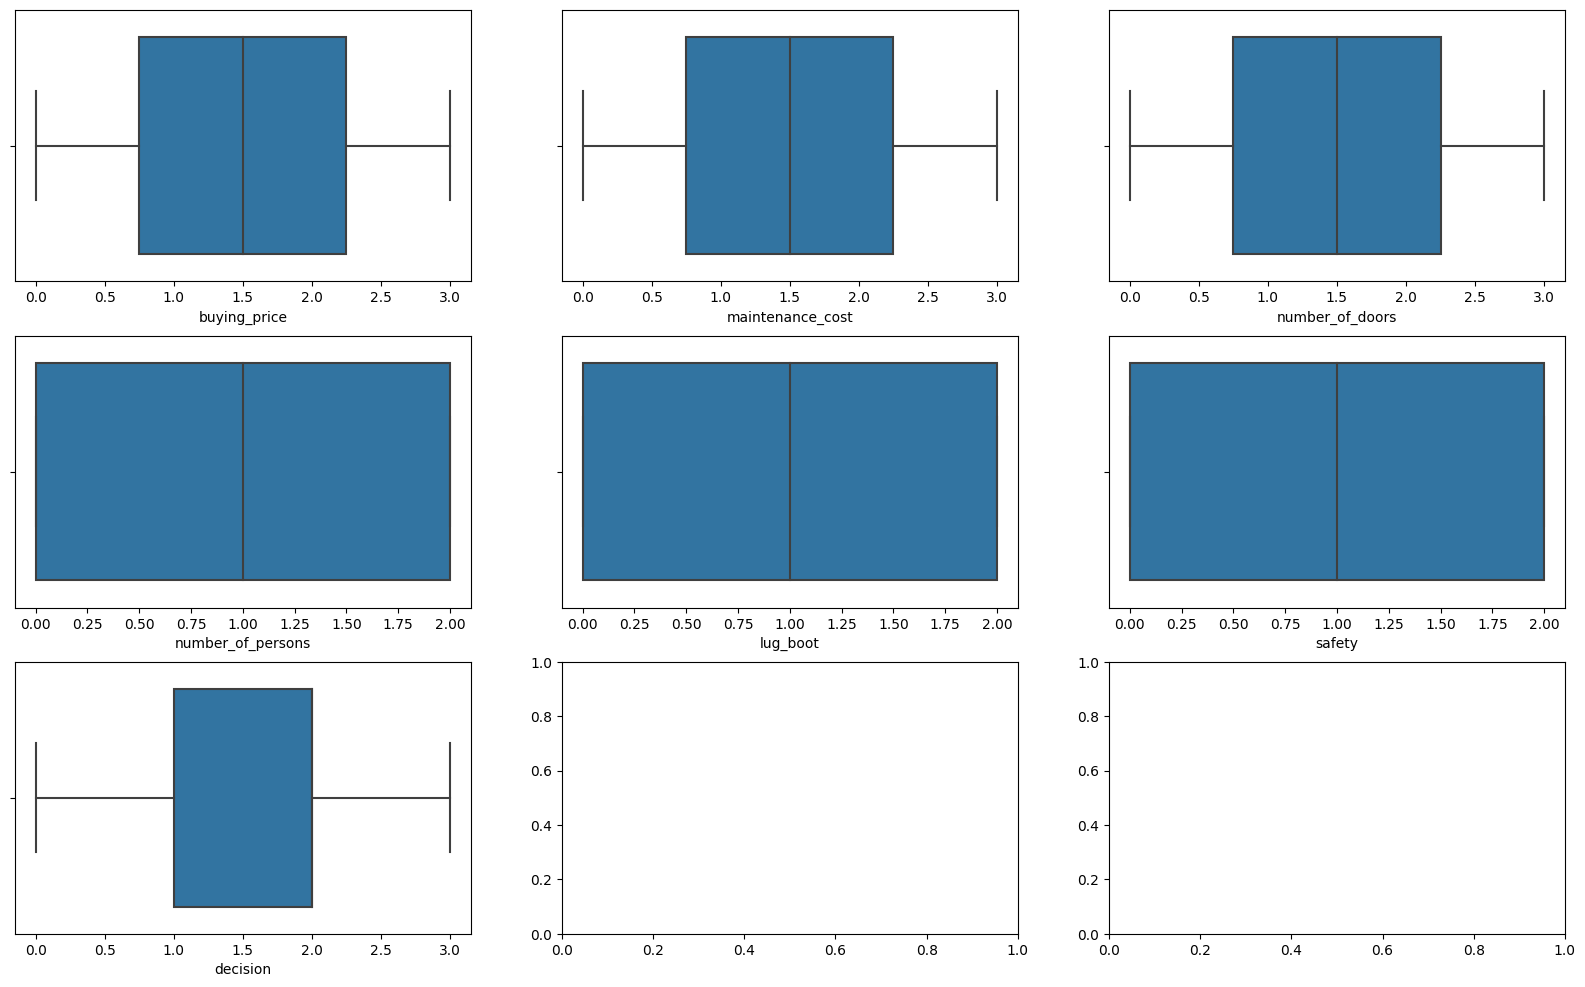

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,12))
axes = axes.flat
for index,column in enumerate(data):
    graph = sns.boxplot(
        data=data, 
        x=column, 
        ax=axes[index])

In [19]:
x = data.drop("decision",axis=1)
y = data["decision"]

### Splitting

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=True)

### Train the model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

### finding accuracy

In [22]:
trainacc = model.score(xtrain, ytrain)
testacc = model.score(xtest, ytest)

pd.DataFrame([trainacc*100, testacc*100], index=['Train Accuracy', 'Test Accuracy'], columns=['Value'])

,Value
Train Accuracy,97.105045
Test Accuracy,91.522158


In [23]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [24]:
from sklearn.metrics import classification_report

In [25]:
def model_training(model_class):
    model_class.fit(xtrain,ytrain)
    ypred = model_class.predict(xtest)

    train = model_class.score(xtrain,ytrain)
    test = model_class.score(xtest,ytest)

    print(f"train_accuracy {train}\n test_accuracy {test}\n\n")
    print(classification_report(ytest,ypred))
    return(model_class)

In [26]:
gaussian = model_training(GaussianNB())

train_accuracy 0.6327543424317618
 test_accuracy 0.6666666666666666


              precision    recall  f1-score   support

         0.0       0.68      0.12      0.20       111
         1.0       0.00      0.00      0.00        22
         2.0       0.84      0.86      0.85       368
         3.0       0.14      1.00      0.25        18

    accuracy                           0.67       519
   macro avg       0.42      0.49      0.32       519
weighted avg       0.75      0.67      0.65       519



In [27]:
multi = model_training(MultinomialNB())

train_accuracy 0.6997518610421837
 test_accuracy 0.7167630057803468


              precision    recall  f1-score   support

         0.0       0.80      0.04      0.07       111
         1.0       0.00      0.00      0.00        22
         2.0       0.72      1.00      0.83       368
         3.0       0.00      0.00      0.00        18

    accuracy                           0.72       519
   macro avg       0.38      0.26      0.23       519
weighted avg       0.68      0.72      0.61       519



In [28]:
bernoulli = model_training(BernoulliNB())

train_accuracy 0.7692307692307693
 test_accuracy 0.7649325626204239


              precision    recall  f1-score   support

         0.0       0.51      0.43      0.47       111
         1.0       0.00      0.00      0.00        22
         2.0       0.82      0.95      0.88       368
         3.0       0.00      0.00      0.00        18

    accuracy                           0.76       519
   macro avg       0.33      0.35      0.34       519
weighted avg       0.69      0.76      0.72       519

